## Persona Result

In [2]:
import pandas as pd

df = pd.read_csv("trait_inference/results/gemini-emb-filtered-trait_inference_score.csv")


In [3]:
import pandas as pd

df = pd.read_csv("trait_inference/results/gemini-emb-filtered-trait_inference_score.csv")

import pandas as pd

# Load the DataFrame
# df = pd.read_csv("persona/gemini-emb_sim-trait_similarity_with_selected_column-034.csv")

# Personas to exclude (as zero-padded strings)
exclude_ids = [5, 6, 8, 10, 13, 18, 27, 32, 34, 35, 42, 46]
exclude_ids = [f"persona_{i:03}" for i in exclude_ids]

# Filter
df = df[~df["persona_id"].isin(exclude_ids)]

# Optional: check result
print(f"✅ Filtered from {len(df)} → {len(df)} rows (excluding {len(exclude_ids)} personas)")

import seaborn as sns
import matplotlib.pyplot as plt


✅ Filtered from 1120 → 1120 rows (excluding 12 personas)


/tmp/ipykernel_532663/1558917697.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_532663/1558917697.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)


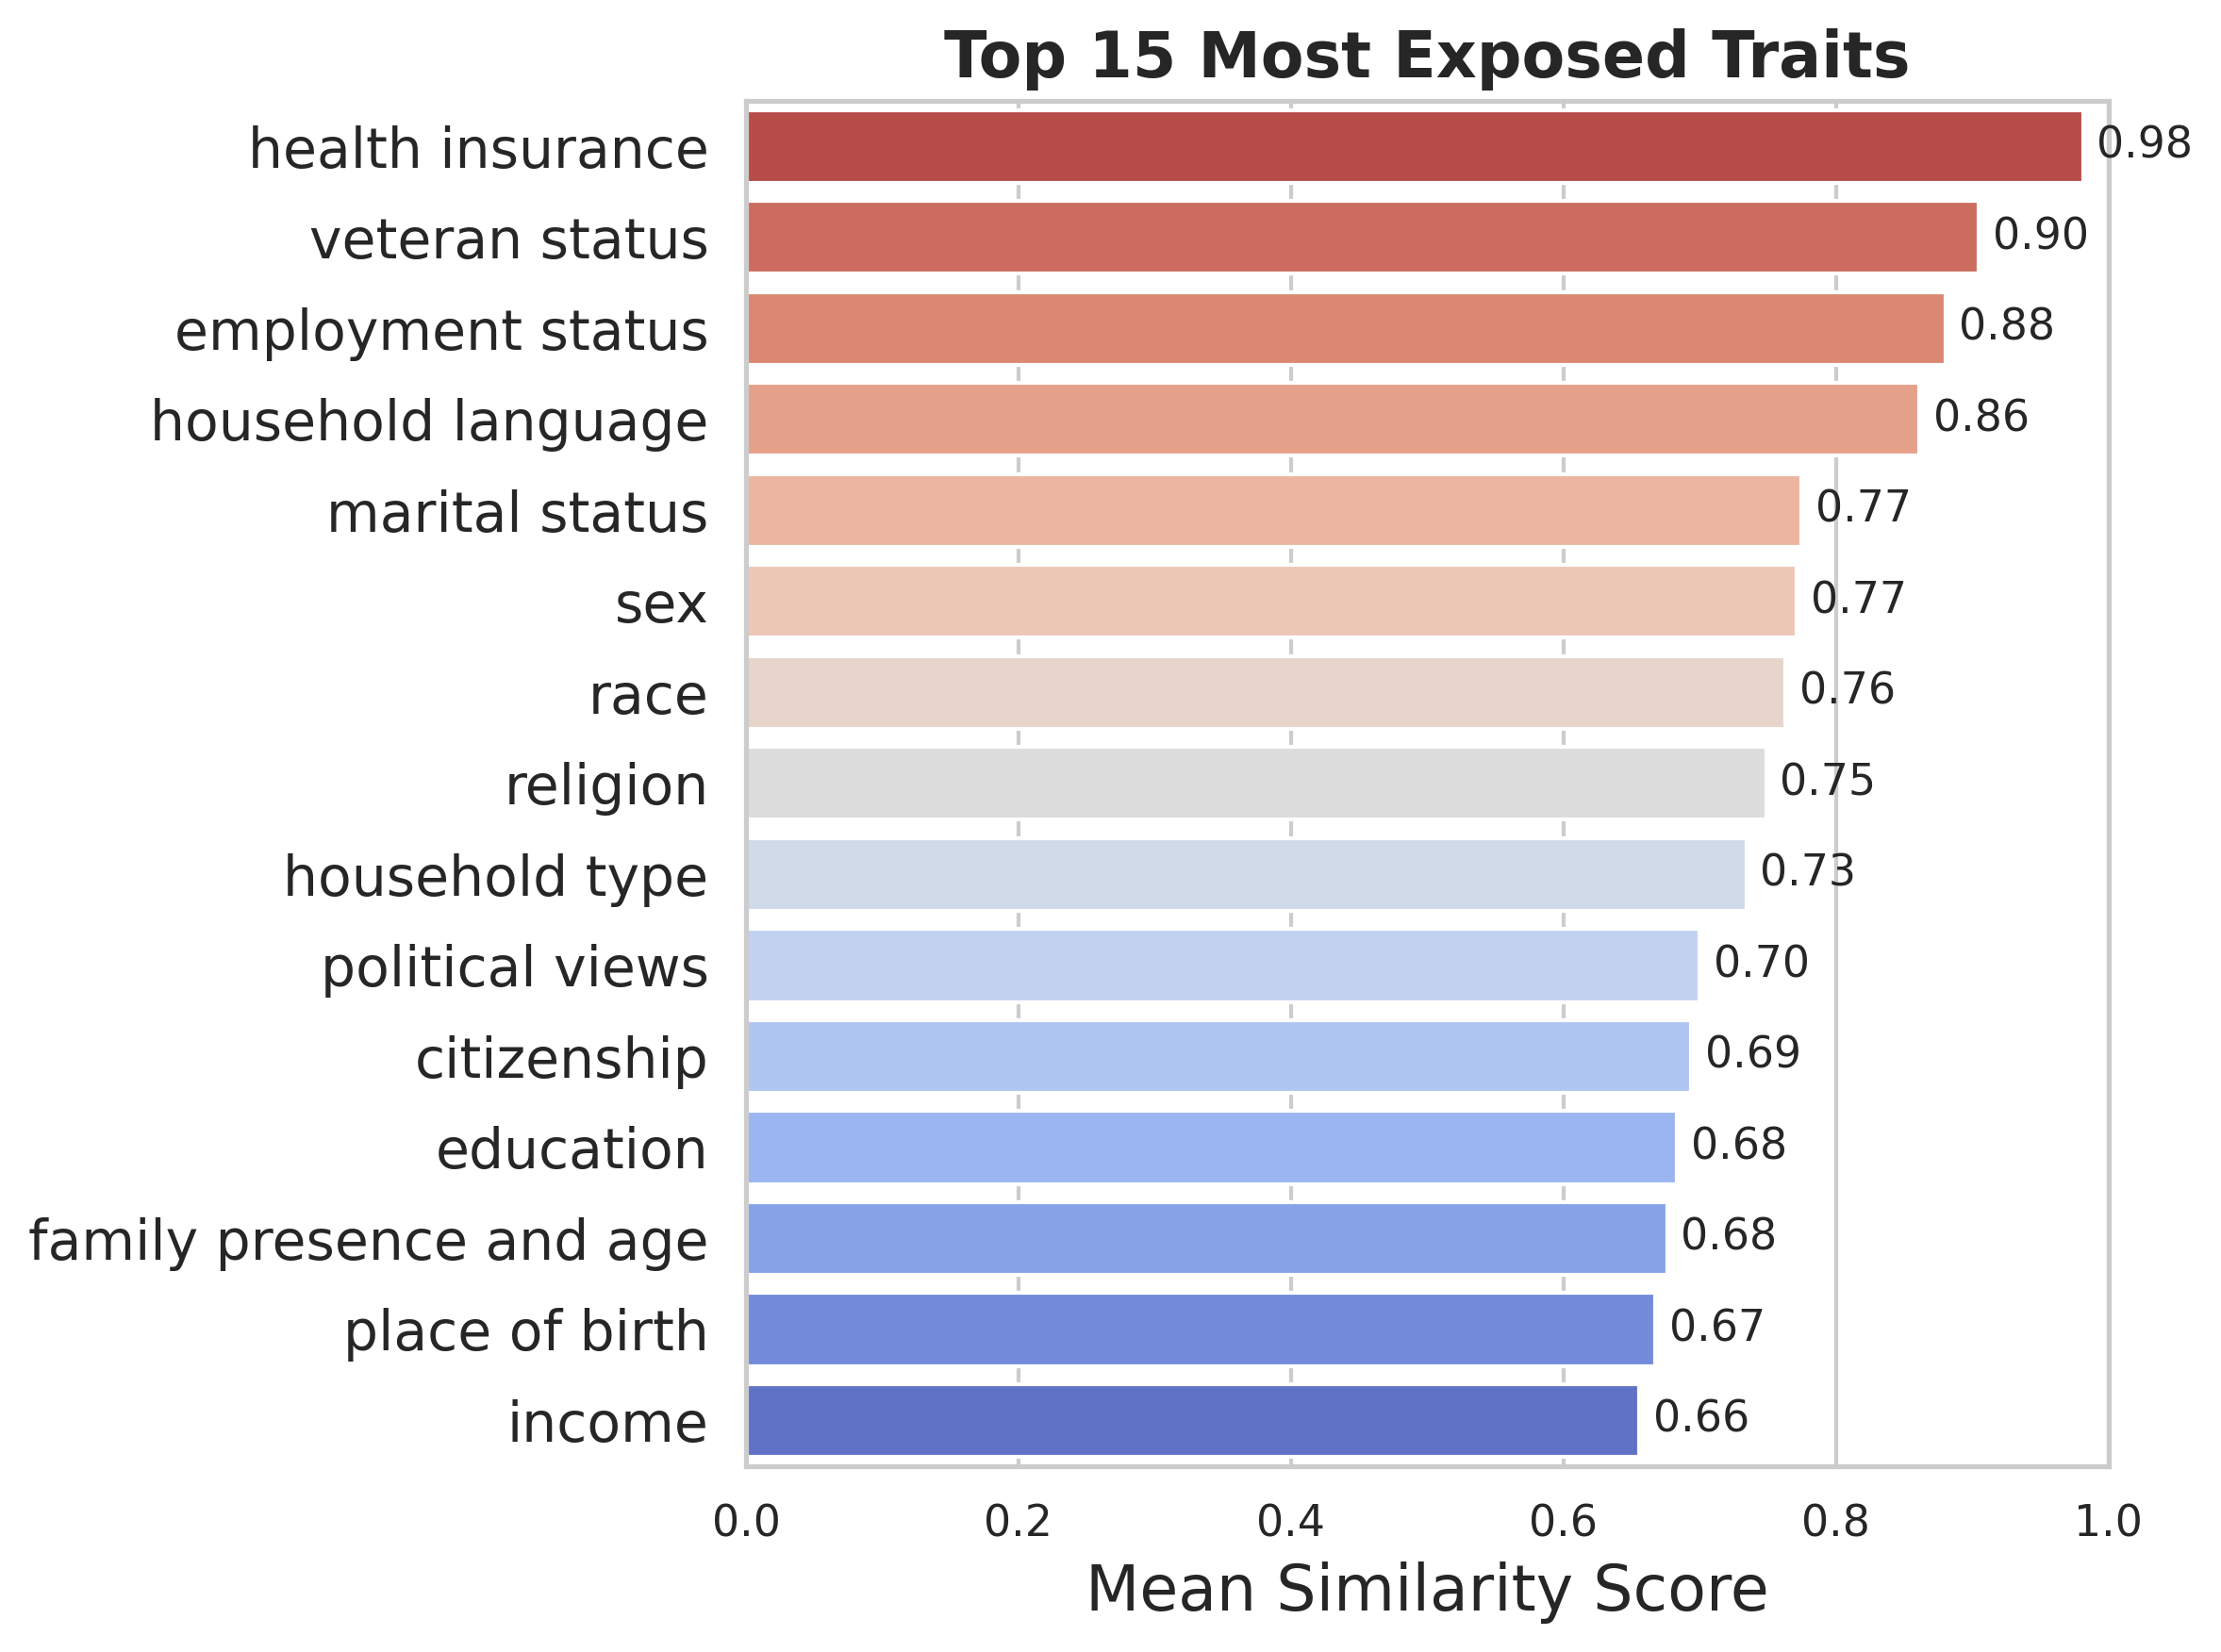

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", font="DejaVu Sans", context="notebook")

trait_avg_score = df.groupby("trait_name")["similarity_score"].mean().sort_values(ascending=False)

top_k = 15
reversed_palette = sns.color_palette("coolwarm", n_colors=top_k)[::-1]  

plt.figure(figsize=(8, 6), dpi=300)
ax = sns.barplot(
    x=trait_avg_score.values[:top_k],
    y=trait_avg_score.index[:top_k],
    palette=reversed_palette
)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)


for i, v in enumerate(trait_avg_score.values[:top_k]):
    ax.text(v + 0.01, i, f"{v:.2f}", va='center', fontsize=11)

plt.title("Top 15 Most Exposed Traits", fontsize=16, fontweight="bold")
plt.xlabel("Mean Similarity Score", fontsize=16)
plt.ylabel("", fontsize=14)
plt.xlim(0, 1)
plt.tight_layout()

plt.savefig("figures/top_traits.pdf", format="pdf", bbox_inches="tight")

plt.show()


/tmp/ipykernel_532663/887717623.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)


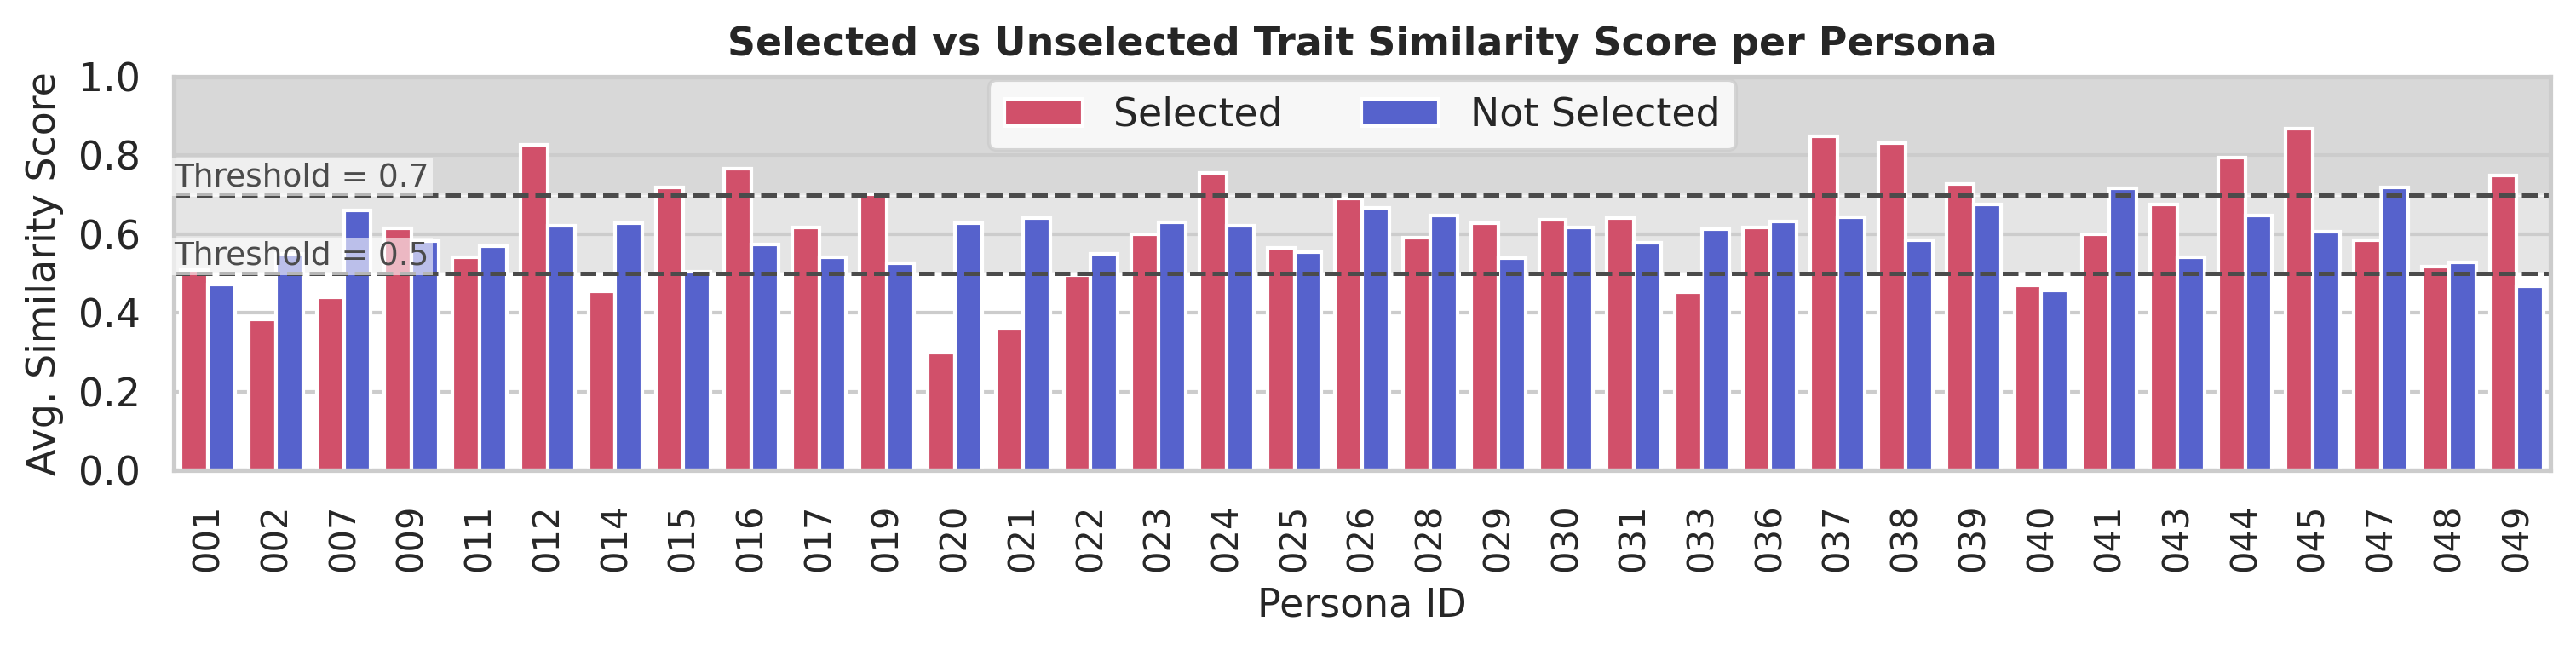

In [5]:
persona_selected_scores = df.groupby(["persona_id", "is_selected"])["similarity_score"].mean().reset_index()
persona_selected_scores["persona_short"] = persona_selected_scores["persona_id"].str.extract(r'(\d+)$')[0]

persona_selected_scores["trait_selection"] = persona_selected_scores["is_selected"].map({
    True: "Selected",
    False: "Not Selected"
})

# ✅ Make trait_selection an ordered category so bars follow this order
persona_selected_scores["trait_selection"] = pd.Categorical(
    persona_selected_scores["trait_selection"],
    categories=["Selected", "Not Selected"],
    ordered=True
)

custom_palette = {"Selected": "#E63B5D", "Not Selected": "#4253E0"}

sns.set_theme(style="whitegrid", font="DejaVu Sans", context="notebook")

# plt.figure(figsize=(12, 2))
fig, ax = plt.subplots(figsize=(12, 2), dpi=300)

# Moderate risk zone (0.5 to 0.7) - light grey
ax.axhspan(0.5, 0.7, facecolor="#C0C0C0", alpha=0.4, zorder=0)

# High risk zone (>0.7) - darker grey
ax.axhspan(0.7, 1.0, facecolor="#9E9E9E", alpha=0.4, zorder=0)

sns.barplot(
    data=persona_selected_scores,
    x="persona_short",
    y="similarity_score",
    hue="trait_selection",
    palette=custom_palette,
    hue_order=["Selected", "Not Selected"],
    edgecolor=None     # ✅ removes the white border

)

ax.legend(
    # title="Trait Selected?",
    loc='upper center',
    bbox_to_anchor=(0.5, 1.04),  # move it slightly above the plot
    ncol=2,                      # two columns (since you only have True/False)
    frameon=True                 # optional: keep a border
)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)

# threshold 
plt.axhline(0.7, color='#4B4B4B', linestyle='--', linewidth=1.2, label="0.7 Threshold")
plt.text(
    x=-0.5, y=0.705, s="Threshold = 0.7",
    color="#4B4B4B", fontsize=9, va="bottom", ha="left",
    bbox=dict(facecolor="white", edgecolor="none", alpha=0.6, pad=1)
)

# ✅ Add 0.5 threshold line (different color to distinguish)
plt.axhline(0.5, color='#4B4B4B', linestyle='--', linewidth=1.2)
plt.text(
    x=-0.5, y=0.505, s="Threshold = 0.5",
    color="#4B4B4B", fontsize=9, va="bottom", ha="left",
    bbox=dict(facecolor="white", edgecolor="none", alpha=0.6, pad=1)
)



plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.xlabel("Persona ID", fontsize=11)
plt.ylabel("Avg. Similarity Score", fontsize=11)
plt.title("Selected vs Unselected Trait Similarity Score per Persona", fontsize=11, fontweight="bold")
plt.savefig("figures/selected_unselected_highlight.pdf", format="pdf", bbox_inches="tight")

# plt.legend(title="Trait Selected?")
# plt.tight_layout()
plt.show()


✅ Filtered from 1122 → 1122 rows (excluding 12 personas)


/tmp/ipykernel_532663/28579994.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)


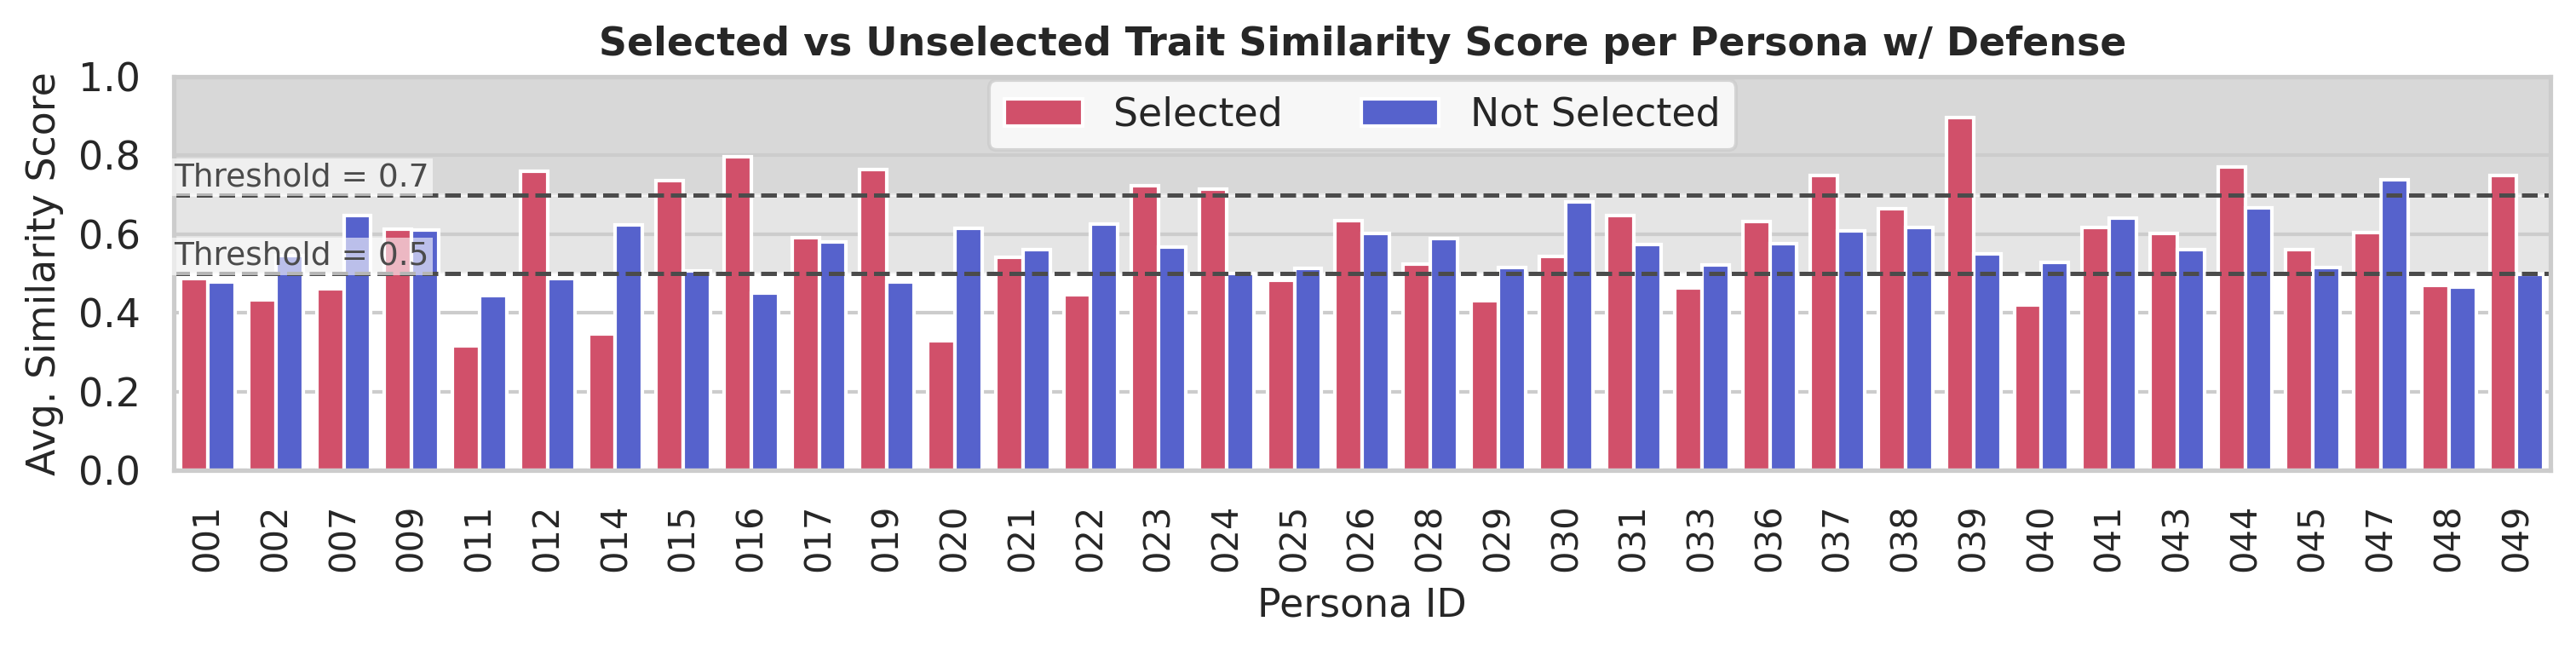

In [7]:
import pandas as pd

df = pd.read_csv("trait_inference/results/defense-decoy+trait_inference_score.csv")

# Load the DataFrame
# df = pd.read_csv("persona/gemini-emb_sim-trait_similarity_with_selected_column-034.csv")

# Personas to exclude (as zero-padded strings)
exclude_ids = [5, 6, 8, 10, 13, 18, 27, 32, 34, 35, 42, 46]
exclude_ids = [f"persona_{i:03}" for i in exclude_ids]

# Filter
df = df[~df["persona_id"].isin(exclude_ids)]

# Optional: check result
print(f"✅ Filtered from {len(df)} → {len(df)} rows (excluding {len(exclude_ids)} personas)")

import seaborn as sns
import matplotlib.pyplot as plt


persona_selected_scores = df.groupby(["persona_id", "is_selected"])["similarity_score"].mean().reset_index()
persona_selected_scores["persona_short"] = persona_selected_scores["persona_id"].str.extract(r'(\d+)$')[0]

persona_selected_scores["trait_selection"] = persona_selected_scores["is_selected"].map({
    True: "Selected",
    False: "Not Selected"
})

# ✅ Make trait_selection an ordered category so bars follow this order
persona_selected_scores["trait_selection"] = pd.Categorical(
    persona_selected_scores["trait_selection"],
    categories=["Selected", "Not Selected"],
    ordered=True
)

custom_palette = {"Selected": "#E63B5D", "Not Selected": "#4253E0"}

sns.set_theme(style="whitegrid", font="DejaVu Sans", context="notebook")

# plt.figure(figsize=(12, 2))
fig, ax = plt.subplots(figsize=(12, 2), dpi=300)

# Moderate risk zone (0.5 to 0.7) - light grey
ax.axhspan(0.5, 0.7, facecolor="#C0C0C0", alpha=0.4, zorder=0)

# High risk zone (>0.7) - darker grey
ax.axhspan(0.7, 1.0, facecolor="#9E9E9E", alpha=0.4, zorder=0)

sns.barplot(
    data=persona_selected_scores,
    x="persona_short",
    y="similarity_score",
    hue="trait_selection",
    palette=custom_palette,
    hue_order=["Selected", "Not Selected"],
    edgecolor=None     # ✅ removes the white border

)

ax.legend(
    # title="Trait Selected?",
    loc='upper center',
    bbox_to_anchor=(0.5, 1.04),  # move it slightly above the plot
    ncol=2,                      # two columns (since you only have True/False)
    frameon=True                 # optional: keep a border
)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)

# threshold 
plt.axhline(0.7, color='#4B4B4B', linestyle='--', linewidth=1.2, label="0.7 Threshold")
plt.text(
    x=-0.5, y=0.705, s="Threshold = 0.7",
    color="#4B4B4B", fontsize=9, va="bottom", ha="left",
    bbox=dict(facecolor="white", edgecolor="none", alpha=0.6, pad=1)
)

# ✅ Add 0.5 threshold line (different color to distinguish)
plt.axhline(0.5, color='#4B4B4B', linestyle='--', linewidth=1.2)
plt.text(
    x=-0.5, y=0.505, s="Threshold = 0.5",
    color="#4B4B4B", fontsize=9, va="bottom", ha="left",
    bbox=dict(facecolor="white", edgecolor="none", alpha=0.6, pad=1)
)

plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.xlabel("Persona ID", fontsize=11)
plt.ylabel("Avg. Similarity Score", fontsize=11)
plt.title("Selected vs Unselected Trait Similarity Score per Persona w/ Defense", fontsize=11, fontweight="bold")

plt.savefig("figures/selected_unselected_highlight_defense.pdf", format="pdf", bbox_inches="tight")

# plt.legend(title="Trait Selected?")
# plt.tight_layout()
plt.show()


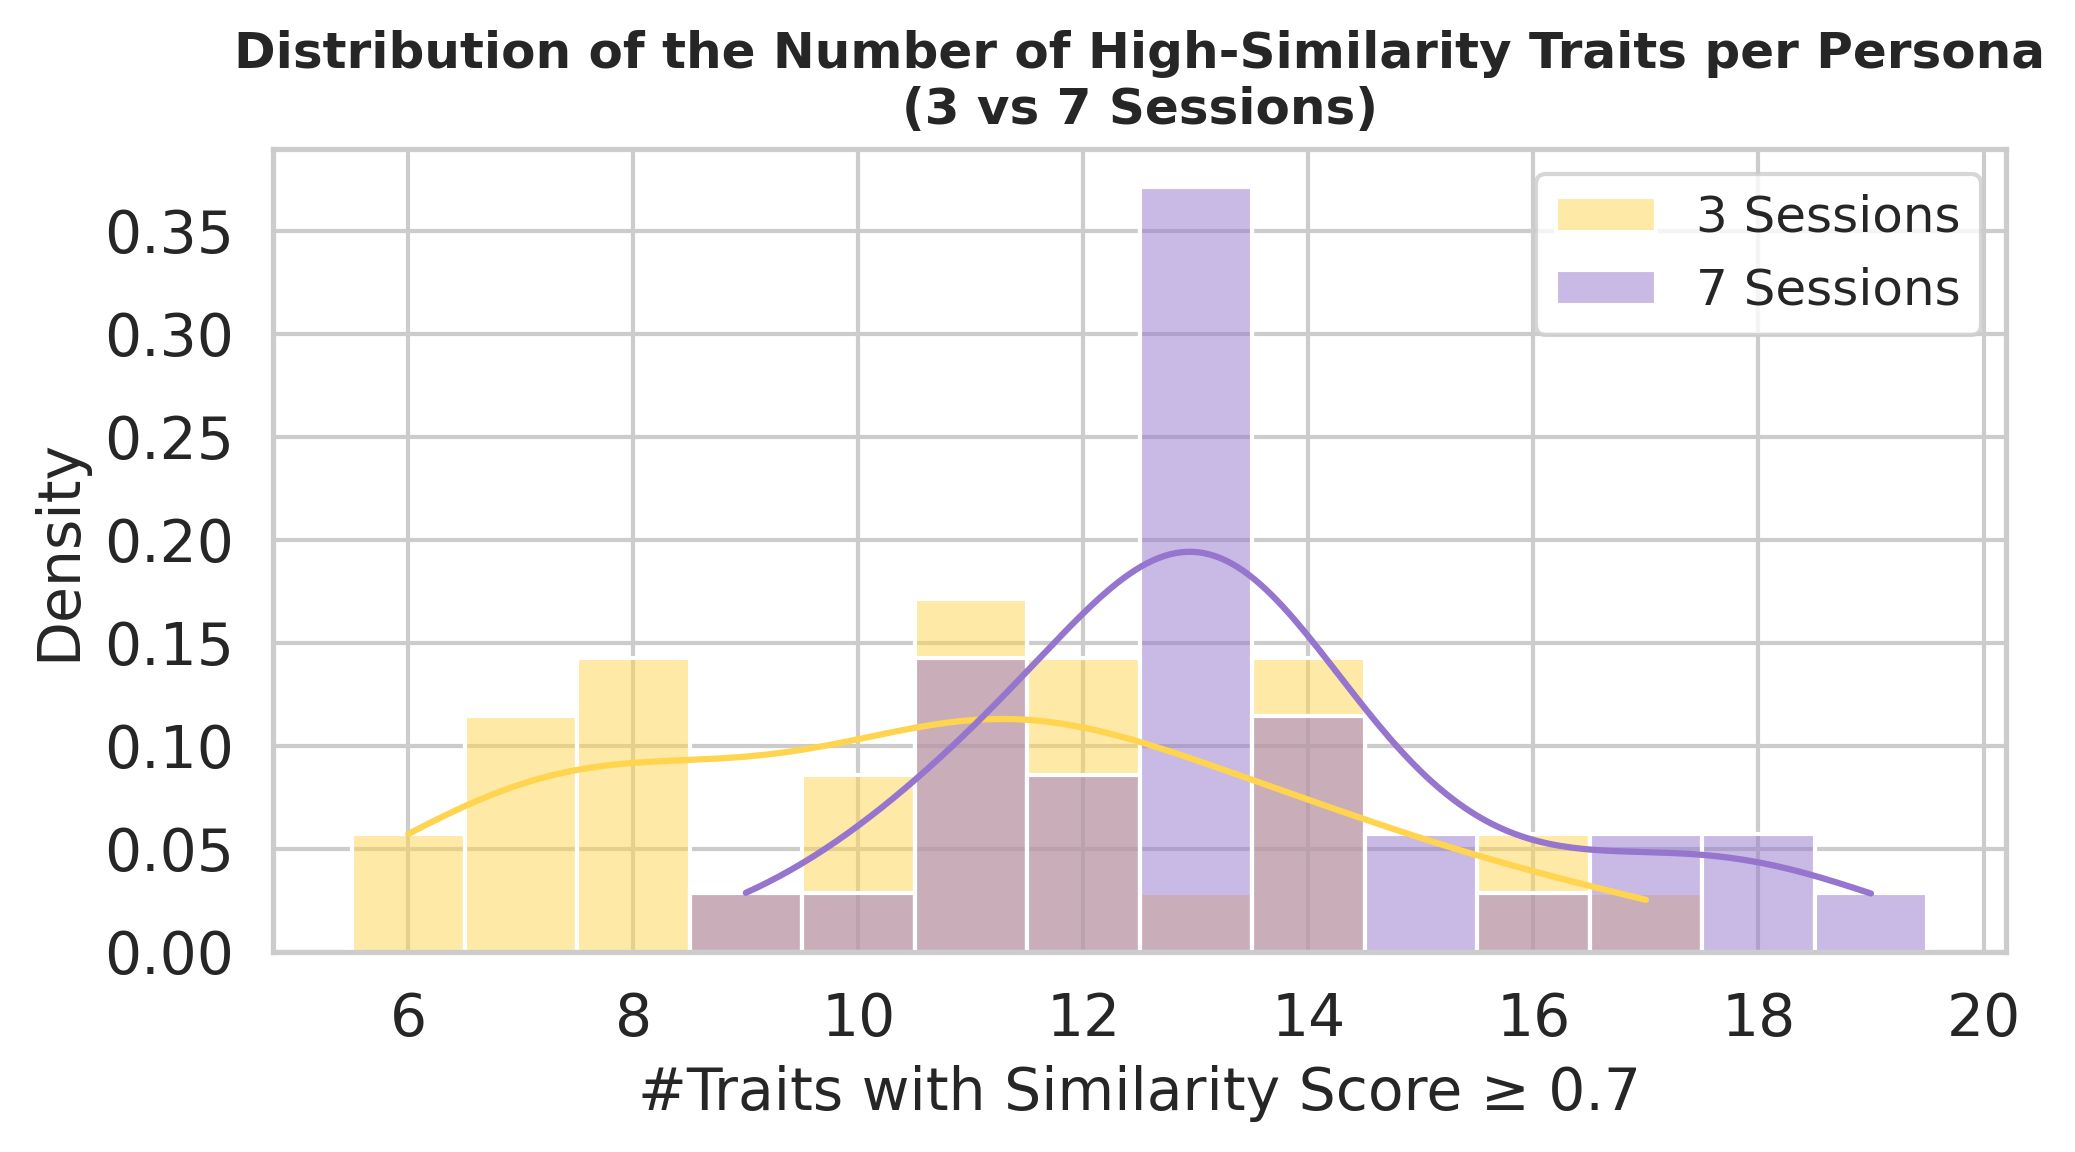

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_high_confidence_distribution(df3, df_full, label3="3 Sessions", label_full="7 Sessions"):
    """
    Plots the distribution of high-confidence inferred traits per persona
    for two datasets on a single histogram.

    Parameters:
        df3 (pd.DataFrame): DataFrame for the 3 sessions filtered dataset.
        df_full (pd.DataFrame): DataFrame for the full sessions filtered dataset.
        label3 (str): Legend label for df3.
        label_full (str): Legend label for df_full.
    """
    # Filter and count traits per persona
    counts_3 = df3[df3["similarity_score"] >= 0.7].groupby("persona_id").size()
    counts_full = df_full[df_full["similarity_score"] >= 0.7].groupby("persona_id").size()

    # Plot
    sns.set_theme(style="whitegrid", font="DejaVu Sans", context="notebook")
    plt.figure(figsize=(7, 4), dpi=300)

    sns.histplot(counts_3, bins=range(0, 33), kde=True, stat="density",
                 discrete=True, color="#FFD54F", label=label3, alpha=0.5)
    sns.histplot(counts_full, bins=range(0, 33), kde=True, stat="density",
                 discrete=True, color="#9575CD", label=label_full, alpha=0.5)

    plt.xlabel("#Traits with Similarity Score ≥ 0.7", fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.title("Distribution of the Number of High-Similarity Traits per Persona\n(3 vs 7 Sessions)", fontweight="bold")
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=12, title_fontsize=12)

    # plt.legend()
    plt.tight_layout()

    plt.savefig("figures/high-sim-traits-distribution.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()

# Example usage after loading your files:
df3 = pd.read_csv("trait_inference/results/gemini-emb-3sessions-filtered-trait_inference_score.csv")
df_full = pd.read_csv("trait_inference/results/gemini-emb-filtered-trait_inference_score.csv")

import pandas as pd

# Load the DataFrame
# df = pd.read_csv("persona/gemini-emb_sim-trait_similarity_with_selected_column-034.csv")

# Personas to exclude (as zero-padded strings)
exclude_ids = [5, 6, 8, 10, 13, 18, 27, 32, 34, 35, 42, 46]
exclude_ids = [f"persona_{i:03}" for i in exclude_ids]

# Filter
df3 = df3[~df3["persona_id"].isin(exclude_ids)]
df_full = df_full[~df_full["persona_id"].isin(exclude_ids)]

plot_high_confidence_distribution(df3, df_full)


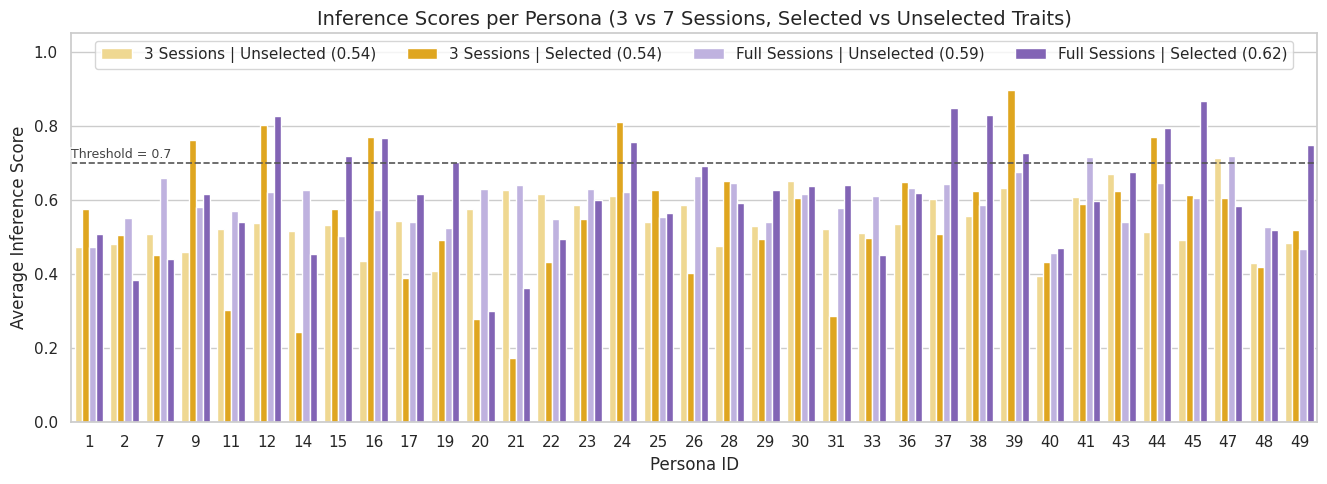

In [7]:
def plot_persona_four_bars(df3, df_full):
    # Aggregate per persona
    agg3 = df3.groupby(["persona_id", "is_selected"])["similarity_score"].mean().reset_index()
    agg3["session_type"] = "3 Sessions"

    agg_full = df_full.groupby(["persona_id", "is_selected"])["similarity_score"].mean().reset_index()
    agg_full["session_type"] = "Full Sessions"

    combined = pd.concat([agg3, agg_full], ignore_index=True)
    combined["persona_short"] = combined["persona_id"].str.extract(r'(\d+)$')[0].astype(int).astype(str)
    combined["hue_group"] = combined["session_type"] + " | " + combined["is_selected"].map({True: "Selected", False: "Unselected"})

    # ✅ Color palette
    palette = {
        "3 Sessions | Selected": "#FFB300",    # amber
        "3 Sessions | Unselected": "#FFE082",  # lighter amber
        "Full Sessions | Selected": "#7E57C2", # purple
        "Full Sessions | Unselected": "#BCAAE6" # lighter purple
    }

    # ✅ Compute averages for legend text
    averages = combined.groupby("hue_group")["similarity_score"].mean().to_dict()

    # ✅ Create a mapping for legend labels with averages
    legend_labels = {k: f"{k} ({v:.2f})" for k, v in averages.items()}

    sns.set_theme(style="whitegrid", font="DejaVu Sans", context="notebook")
    plt.figure(figsize=(14, 5))

    ax = sns.barplot(
        data=combined,
        x="persona_short",
        y="similarity_score",
        hue="hue_group",
        palette=palette
    )

    # Draw threshold line
    plt.axhline(0.7, color="#555555", linestyle="--", linewidth=1.2)
    
    # ✅ Annotate threshold on the plot (top-left corner of the line)
    plt.text(
        x=-0.5, y=0.705, s="Threshold = 0.7",
        color="#444444", fontsize=9, va="bottom", ha="left",
        bbox=dict(facecolor="white", edgecolor="none", alpha=0.6, pad=1)
    )

    # ✅ Modify legend to include averages
    handles, labels = ax.get_legend_handles_labels()
    new_labels = [legend_labels.get(lbl, lbl) for lbl in labels]

    ax.legend(
        handles, new_labels,
        # title="# Session | is_selected (Average Score)",
        loc='upper center',
        bbox_to_anchor=(0.5, 1),
        ncol=5  # makes it a two-row legend
    )


    # plt.xticks(rotation=90)
    plt.ylim(0, 1.05)
    plt.xlabel("Persona ID")
    plt.ylabel("Average Inference Score")
    plt.title("Inference Scores per Persona (3 vs 7 Sessions, Selected vs Unselected Traits)", fontsize=14)
    plt.tight_layout()
    plt.show()


plot_persona_four_bars(df3, df_full)


/tmp/ipykernel_532663/4265702662.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trait_dist = df.groupby(["confidence_bin", "trait_category"]).size().reset_index(name="count")
/tmp/ipykernel_532663/4265702662.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_532663/4265702662.py:134: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=14)


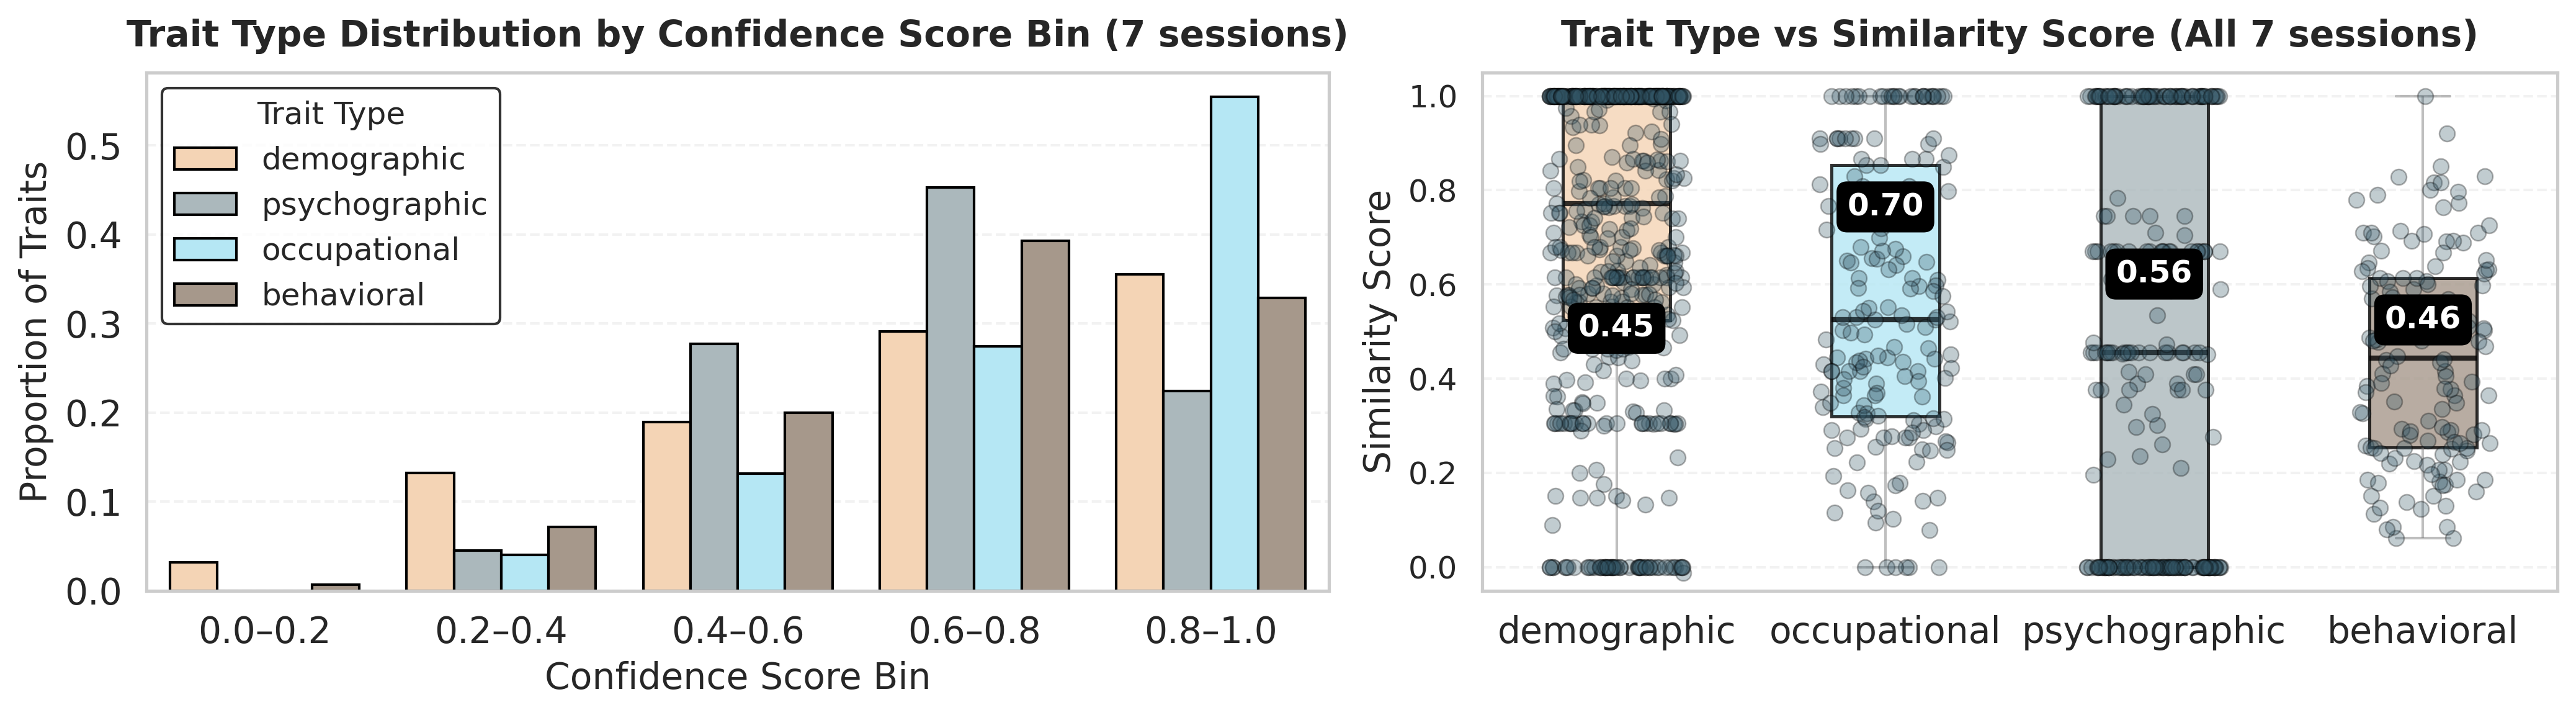

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Example usage after loading your files:
df3 = pd.read_csv("trait_inference/results/gemini-emb-3sessions-filtered-trait_inference_score.csv")
df_full = pd.read_csv("trait_inference/results/gemini-emb-filtered-trait_inference_score.csv")
# df_full = pd.read_csv("trait_inference/results/defense-decoy+trait_inference_score.csv")

import pandas as pd

# Load the DataFrame
# df = pd.read_csv("persona/gemini-emb_sim-trait_similarity_with_selected_column-034.csv")

# Personas to exclude (as zero-padded strings)
exclude_ids = [5, 6, 8, 10, 13, 18, 27, 32, 34, 35, 42, 46]
exclude_ids = [f"persona_{i:03}" for i in exclude_ids]

# Filter
df3 = df3[~df3["persona_id"].isin(exclude_ids)]
df_full = df_full[~df_full["persona_id"].isin(exclude_ids)]

df = df_full
# Reuse your theme and palette
sns.set_theme(style="whitegrid", font="DejaVu Sans", context="notebook")

# trait_palette = {
#     "demographic":   "#A1C9F4",  # Frosted Cyan
#     "psychographic": "#D5AAFF",  # Lavender Pink
#     "occupational":  "#C3FDB8",  # Light Pistachio
#     "behavioral":    "#FFE1A8",  # Vanilla Cream
# }


trait_palette = {
    "demographic":   "#FFD4AB",  # Lavender Pink
    "psychographic": "#A8BABF",  # 
    "occupational":  "#ABEDFF",  # Vanilla Cream
    "behavioral":    "#AA9887",  # 
}


# Define bins for similarity score
bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ["0.0–0.2", "0.2–0.4", "0.4–0.6", "0.6–0.8", "0.8–1.0"]
df["confidence_bin"] = pd.cut(df["confidence"], bins=bins, labels=labels, include_lowest=True)

# --- Trait Distribution by Score Bin ---
trait_dist = df.groupby(["confidence_bin", "trait_category"]).size().reset_index(name="count")
# trait_totals = trait_dist.groupby("confidence_bin")["count"].transform("sum")
# trait_dist["proportion"] = trait_dist["count"] / trait_totals
trait_totals = trait_dist.groupby("trait_category")["count"].transform("sum")
trait_dist["proportion"] = trait_dist["count"] / trait_totals

# --- Create subplots ---
fig, ax = plt.subplots(1, 2, figsize=(14, 4), dpi=300, gridspec_kw={'width_ratios': [1.1, 1]})

# --- Left Plot: Barplot ---
sns.barplot(
    data=trait_dist,
    x="confidence_bin",
    y="proportion",
    hue="trait_category",
    palette=trait_palette,
    hue_order=["demographic", "psychographic", "occupational", "behavioral"],
    edgecolor="black",
    ax=ax[0],
)

ax[0].set_title("Trait Type Distribution by Confidence Score Bin (7 sessions)", fontsize=14, pad=10, fontweight="bold")
ax[0].set_xlabel("Confidence Score Bin", fontsize=14)
ax[0].set_ylabel("Proportion of Traits", fontsize=14)
ax[0].tick_params(labelsize=14)
ax[0].grid(axis="y", linestyle="--", alpha=0.25)
ax[0].legend(
    title="Trait Type",
    loc='upper left',
    bbox_to_anchor=(0, 1),
    title_fontsize=12,
    fontsize=12,
    frameon=True,
    edgecolor="black",
    facecolor="white"
)

trait_means = df.groupby("trait_category")["similarity_score"].mean()

# Annotate average on boxplot
for i, (category, mean_val) in enumerate(trait_means.items()):
    # ax[1].axhline(mean_val, color="red", linestyle="--", alpha=0.6, zorder=1)
    
    # Annotate with a box background
    ax[1].text(
        i, mean_val + 0.03, f"{mean_val:.2f}",
        ha='center', va='bottom', color="white", fontsize=12, fontweight='bold',
        bbox=dict(facecolor="black", edgecolor="black", boxstyle="round,pad=0.3", alpha=1),
        zorder=10
    )

# --- Right Plot: Boxplot + Stripplot ---
sns.boxplot(
    data=df,
    x="trait_category",
    y="similarity_score",
    palette=trait_palette,
    boxprops=dict(alpha=0.8, linewidth=1.2, edgecolor="black"),
    medianprops=dict(color="black", linewidth=2, alpha=0.8),
    whiskerprops=dict(color="gray", alpha=0.5),
    capprops=dict(color="gray", alpha=0.5),
    width=0.4,
    ax=ax[1]
)

sns.stripplot(
    data=df,
    x="trait_category",
    y="similarity_score",
    color="#335666",
    edgecolor="black",
    linewidth=0.6,          # Thickness of outline
    alpha=0.3,
    size=6,
    jitter=0.25,
    ax=ax[1]
)

ax[1].set_title("Trait Type vs Similarity Score (All 7 sessions)", fontsize=14, pad=10, fontweight="bold")
ax[1].set_xlabel("")
ax[1].set_ylabel("Similarity Score", fontsize=14)
ax[1].set_ylim(-0.05, 1.05)
ax[1].tick_params(labelsize=12)
ax[1].grid(axis="y", linestyle="--", alpha=0.25)
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=14)

plt.tight_layout()
plt.savefig("figures/confidence+inference.pdf", format="pdf", bbox_inches="tight")

plt.show()


/tmp/ipykernel_532663/4111390691.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trait_dist = df.groupby(["confidence_bin", "trait_category"]).size().reset_index(name="count")
/tmp/ipykernel_532663/4111390691.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_532663/4111390691.py:134: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=14)


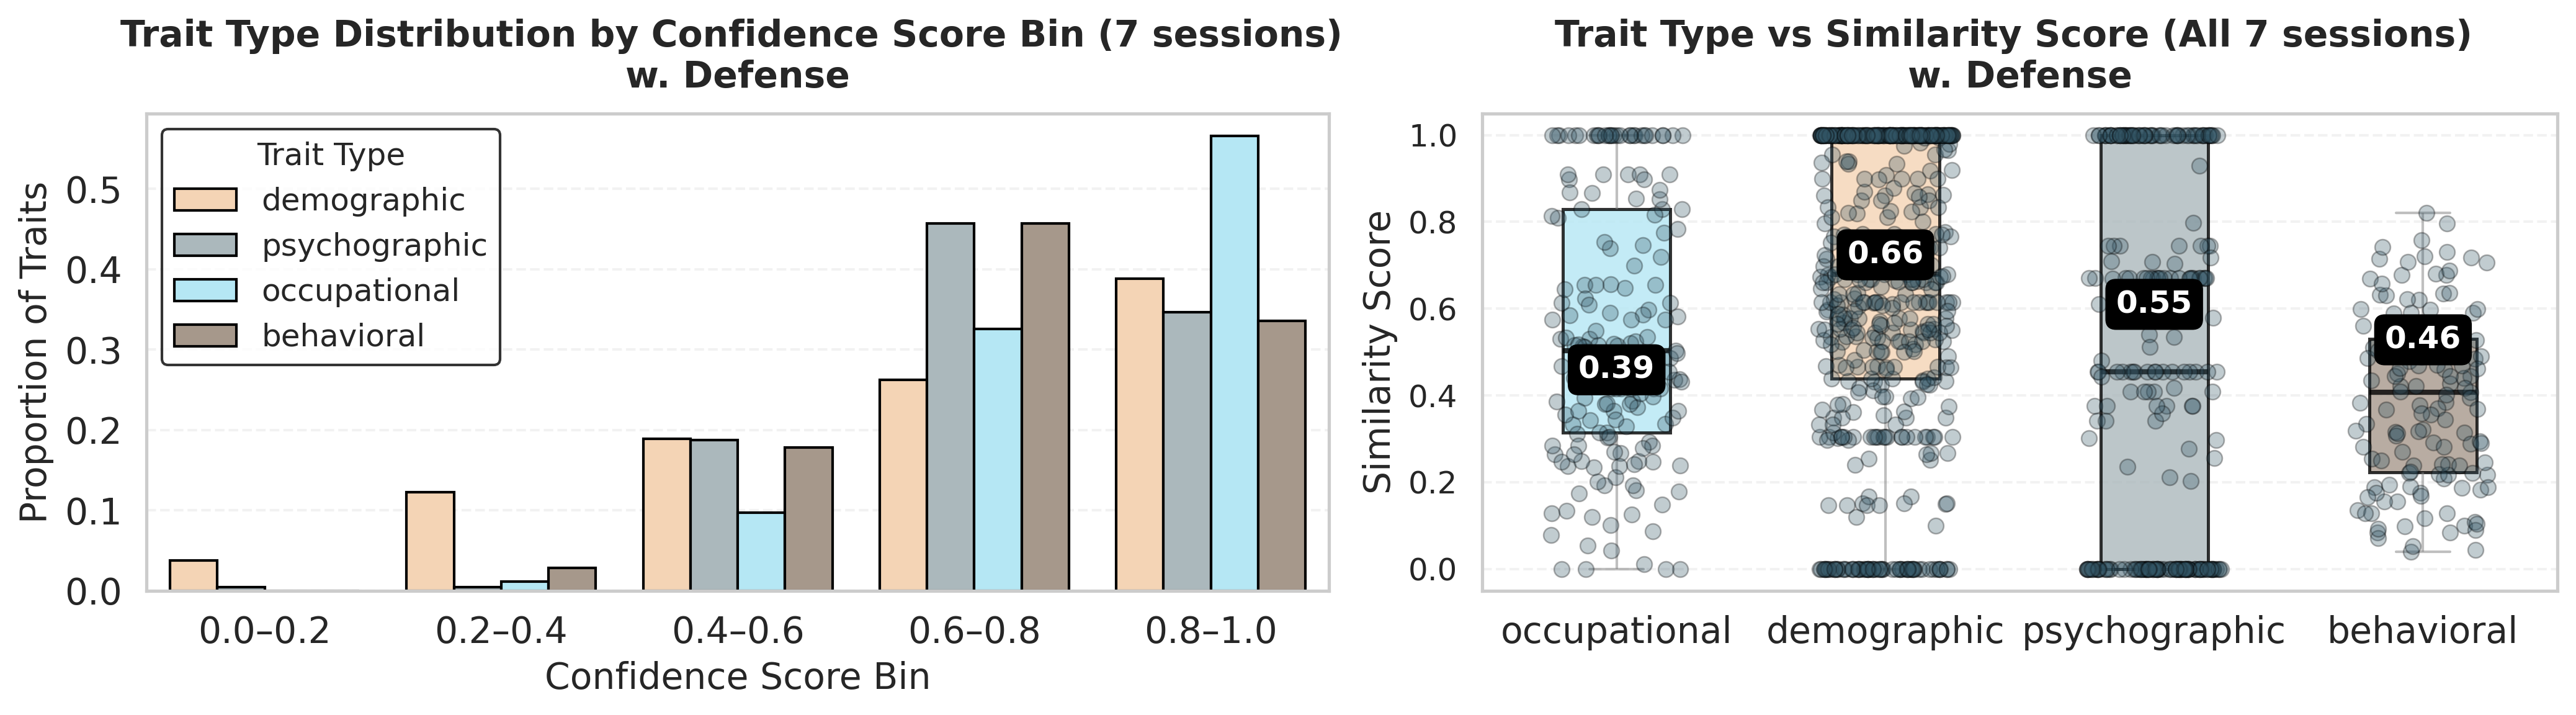

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Example usage after loading your files:
df3 = pd.read_csv("trait_inference/results/gemini-emb-3sessions-filtered-trait_inference_score.csv")
# df_full = pd.read_csv("trait_inference/results/gemini-emb-filtered-trait_inference_score.csv")
df_full = pd.read_csv("trait_inference/results/defense-decoy+trait_inference_score.csv")

import pandas as pd

# Load the DataFrame
# df = pd.read_csv("persona/gemini-emb_sim-trait_similarity_with_selected_column-034.csv")

# Personas to exclude (as zero-padded strings)
exclude_ids = [5, 6, 8, 10, 13, 18, 27, 32, 34, 35, 42, 46]
exclude_ids = [f"persona_{i:03}" for i in exclude_ids]

# Filter
df3 = df3[~df3["persona_id"].isin(exclude_ids)]
df_full = df_full[~df_full["persona_id"].isin(exclude_ids)]

df = df_full
# Reuse your theme and palette
sns.set_theme(style="whitegrid", font="DejaVu Sans", context="notebook")

# trait_palette = {
#     "demographic":   "#A1C9F4",  # Frosted Cyan
#     "psychographic": "#D5AAFF",  # Lavender Pink
#     "occupational":  "#C3FDB8",  # Light Pistachio
#     "behavioral":    "#FFE1A8",  # Vanilla Cream
# }


trait_palette = {
    "demographic":   "#FFD4AB",  # Lavender Pink
    "psychographic": "#A8BABF",  # 
    "occupational":  "#ABEDFF",  # Vanilla Cream
    "behavioral":    "#AA9887",  # 
}


# Define bins for similarity score
bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ["0.0–0.2", "0.2–0.4", "0.4–0.6", "0.6–0.8", "0.8–1.0"]
df["confidence_bin"] = pd.cut(df["confidence"], bins=bins, labels=labels, include_lowest=True)

# --- Trait Distribution by Score Bin ---
trait_dist = df.groupby(["confidence_bin", "trait_category"]).size().reset_index(name="count")
# trait_totals = trait_dist.groupby("confidence_bin")["count"].transform("sum")
# trait_dist["proportion"] = trait_dist["count"] / trait_totals
trait_totals = trait_dist.groupby("trait_category")["count"].transform("sum")
trait_dist["proportion"] = trait_dist["count"] / trait_totals

# --- Create subplots ---
fig, ax = plt.subplots(1, 2, figsize=(14, 4), dpi=300, gridspec_kw={'width_ratios': [1.1, 1]})

# --- Left Plot: Barplot ---
sns.barplot(
    data=trait_dist,
    x="confidence_bin",
    y="proportion",
    hue="trait_category",
    palette=trait_palette,
    hue_order=["demographic", "psychographic", "occupational", "behavioral"],
    edgecolor="black",
    ax=ax[0],
)

ax[0].set_title("Trait Type Distribution by Confidence Score Bin (7 sessions) \nw. Defense", fontsize=14, pad=10, fontweight="bold")
ax[0].set_xlabel("Confidence Score Bin", fontsize=14)
ax[0].set_ylabel("Proportion of Traits", fontsize=14)
ax[0].tick_params(labelsize=14)
ax[0].grid(axis="y", linestyle="--", alpha=0.25)
ax[0].legend(
    title="Trait Type",
    loc='upper left',
    bbox_to_anchor=(0, 1),
    title_fontsize=12,
    fontsize=12,
    frameon=True,
    edgecolor="black",
    facecolor="white"
)

trait_means = df.groupby("trait_category")["similarity_score"].mean()

# Annotate average on boxplot
for i, (category, mean_val) in enumerate(trait_means.items()):
    # ax[1].axhline(mean_val, color="red", linestyle="--", alpha=0.6, zorder=1)
    
    # Annotate with a box background
    ax[1].text(
        i, mean_val + 0.03, f"{mean_val:.2f}",
        ha='center', va='bottom', color="white", fontsize=12, fontweight='bold',
        bbox=dict(facecolor="black", edgecolor="black", boxstyle="round,pad=0.3", alpha=1),
        zorder=10
    )

# --- Right Plot: Boxplot + Stripplot ---
sns.boxplot(
    data=df,
    x="trait_category",
    y="similarity_score",
    palette=trait_palette,
    boxprops=dict(alpha=0.8, linewidth=1.2, edgecolor="black"),
    medianprops=dict(color="black", linewidth=2, alpha=0.8),
    whiskerprops=dict(color="gray", alpha=0.5),
    capprops=dict(color="gray", alpha=0.5),
    width=0.4,
    ax=ax[1]
)

sns.stripplot(
    data=df,
    x="trait_category",
    y="similarity_score",
    color="#335666",
    edgecolor="black",
    linewidth=0.6,          # Thickness of outline
    alpha=0.3,
    size=6,
    jitter=0.25,
    ax=ax[1]
)

ax[1].set_title("Trait Type vs Similarity Score (All 7 sessions) \nw. Defense", fontsize=14, pad=10, fontweight="bold")
ax[1].set_xlabel("")
ax[1].set_ylabel("Similarity Score", fontsize=14)
ax[1].set_ylim(-0.05, 1.05)
ax[1].tick_params(labelsize=12)
ax[1].grid(axis="y", linestyle="--", alpha=0.25)
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=14)

plt.tight_layout()
plt.savefig("figures/confidence+inference_defense.pdf", format="pdf", bbox_inches="tight")

plt.show()


In [9]:
import pandas as pd

# Load your dataset
df = pd.read_csv("persona/defense-decoy+trait_inference_score.csv")

# Exclude personas
exclude_ids = [5, 6, 8, 10, 13, 18, 27, 32, 34, 35, 42, 46]
exclude_ids = [f"persona_{i:03}" for i in exclude_ids]
df = df[~df["persona_id"].isin(exclude_ids)]

# Compute median similarity score per trait category
trait_medians = df.groupby("trait_category")["similarity_score"].median()
print(trait_medians)



trait_category
behavioral       0.408
demographic      0.679
occupational     0.503
psychographic    0.455
Name: similarity_score, dtype: float64


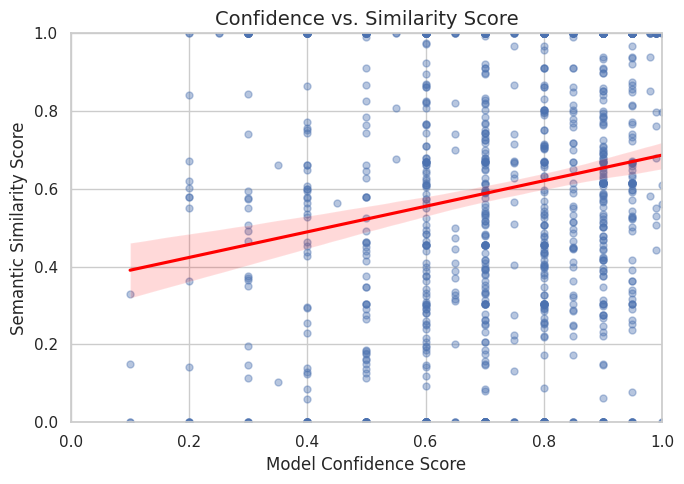

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing values in the relevant columns
df = df.dropna(subset=["confidence", "similarity_score"])

# Optional: Convert to numeric if types are wrong
df["confidence"] = pd.to_numeric(df["confidence"], errors="coerce")
df["similarity_score"] = pd.to_numeric(df["similarity_score"], errors="coerce")

# Set plot style
sns.set(style="whitegrid")

# Draw scatter with trendline
plt.figure(figsize=(7, 5))
sns.regplot(
    data=df,
    x="confidence",
    y="similarity_score",
    scatter_kws={"alpha": 0.4, "s": 25},
    line_kws={"color": "red"},
    ci=95  # Confidence interval for trend
)

plt.title("Confidence vs. Similarity Score", fontsize=14)
plt.xlabel("Model Confidence Score", fontsize=12)
plt.ylabel("Semantic Similarity Score", fontsize=12)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.tight_layout()
plt.show()
